In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df_train = pd.read_csv("./healthcare/train_data.csv")

In [5]:
df_train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [48]:
df_test = pd.read_csv("./healthcare/test_data.csv")

In [49]:
df_test

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


## Converting Categorical data to numeric

In [8]:
def convertCategoricalFeatures(df):
    dept = df["Department"].unique()
    dept.sort()
    depatment = dict(zip(dept, range(len(dept))))
    df.Department.replace(depatment, inplace=True)
    print(depatment)
    
    HRCode = df["Hospital_region_code"].unique()
    HRCode.sort()
    hospitalRegionCode = dict(zip(HRCode, range(len(HRCode))))
    df.Hospital_region_code.replace(hospitalRegionCode, inplace=True)
    print(hospitalRegionCode)
    
    WType = df["Ward_Type"].unique()
    WType.sort()
    wardType = dict(zip(WType, range(len(WType))))
    df.Ward_Type.replace(wardType, inplace=True)
    print(wardType)
    
    WFCode = df["Ward_Facility_Code"].unique()
    WFCode.sort()
    wardFacilityCode = dict(zip(WFCode, range(len(WFCode))))
    df.Ward_Facility_Code.replace(wardFacilityCode, inplace=True)
    print(wardFacilityCode)
    
    admissionType = df["Type of Admission"].unique()
    admissionType.sort()
    typeOfAdmission = dict(zip(admissionType, range(len(admissionType))))
    df["Type of Admission"].replace(typeOfAdmission, inplace=True)
    print(typeOfAdmission)
   
    illness = df["Severity of Illness"].unique()
    illness.sort()
    illnessSeverity = dict(zip(illness, range(len(illness))))
    df["Severity of Illness"].replace(illnessSeverity, inplace=True)
    print(illnessSeverity)
    
    age = df["Age"].unique()
    age.sort()
    patientAge = dict(zip(age, range(len(age))))
    df["Age"].replace(patientAge, inplace=True)
    print(patientAge)
    
    HTCode = df["Hospital_type_code"].unique()
    HTCode.sort()
    hospitalTypeCode = dict(zip(HTCode, range(len(HTCode))))
    df["Hospital_type_code"].replace(hospitalTypeCode, inplace=True)
    print(hospitalTypeCode)
    
convertCategoricalFeatures(df_train)

LOStay = df_train["Stay"].unique()
LOStay.sort()
lengthOfStay = dict(zip(LOStay, range(len(LOStay))))
df_train["Stay"].replace(lengthOfStay, inplace=True)
print(lengthOfStay)

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'Extreme': 0, 'Minor': 1, 'Moderate': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [9]:
df_train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


## Check for empty records

In [10]:
df_train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

df_train['Bed Grade'] = pd.to_numeric(df_train['Bed Grade'])

In [13]:
df_train['Bed Grade'].unique()

array([ 2.,  3.,  4.,  1., nan])

In [24]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_train['Bed Grade']=imp.fit_transform(df_train[['Bed Grade']]).ravel()

In [25]:
df_train['Bed Grade'].unique()

array([2., 3., 4., 1.])

In [26]:
df_train.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,313906.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,1.256841,4.771717,0.778098,3.197627,1.943779,1.888575,3.286913,2.625585,65747.579472,7.251859,0.782768,1.374076,3.284099,4.127777,4880.749392,2.698550
std,91925.276847,8.633755,1.535712,3.102535,0.752527,1.168171,0.561245,0.804655,1.688050,0.873070,37979.936440,4.745266,0.688957,0.768377,1.764061,1.889567,1086.776254,2.150075
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000
25%,79610.250000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,32847.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4186.000000,1.000000
50%,159219.500000,19.000000,1.000000,5.000000,1.000000,3.000000,2.000000,2.000000,4.000000,3.000000,65724.500000,8.000000,1.000000,2.000000,3.000000,4.000000,4741.000000,2.000000
75%,238828.750000,26.000000,2.000000,7.000000,1.000000,4.000000,2.000000,2.000000,5.000000,3.000000,98470.000000,8.000000,1.000000,2.000000,4.000000,5.000000,5409.000000,3.000000
max,318438.000000,32.000000,6.000000,13.000000,2.000000,24.000000,4.000000,5.000000,5.000000,4.000000,131624.000000,38.000000,2.000000,2.000000,32.000000,9.000000,11008.000000,10.000000


## ML Model to Predict Length of Stay

In [27]:
X = df_train.drop(columns=["Stay", "City_Code_Patient", "patientid"])
y = df_train.Stay

### splitting dataset as training and validation set

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [65]:
# PredictLOSClassifier = RandomForestClassifier(max_depth=2, random_state=0)
PredictLOSClassifier = RandomForestClassifier(n_estimators=25, max_features=4, max_depth=25, min_samples_split=2,
                              min_samples_leaf=3, random_state=30)
PredictLOSClassifier.fit(X_train,y_train)

predictedOutput = PredictLOSClassifier.predict(X_val)
print("Predicted output: ",predictedOutput)
mse = mean_squared_error(y_val, predictedOutput)
MSE = np.sqrt(mse)
print("Mean Squared error: ",MSE)

Predicted output:  [1 3 2 ... 2 3 2]
Mean Squared error:  1.7493815489222904


### validating accuracy of model

In [66]:
print("accuracy_score: %.2f" % accuracy_score(y_val, predictedOutput))

accuracy_score: 0.40


Text(0.5, 1.0, 'Feature Importance')

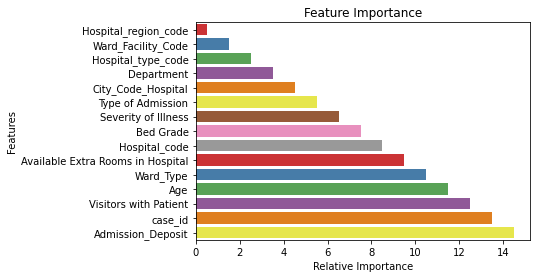

In [39]:
feature_importance = PredictLOSClassifier.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
sns.barplot(pos,X_train.columns[sorted_idx], palette = 'Set1')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

## Applying model to test set

In [50]:
convertCategoricalFeatures(df_test)

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'Extreme': 0, 'Minor': 1, 'Moderate': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}


In [51]:
df_test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [52]:
df_test['Bed Grade']=imp.fit_transform(df_test[['Bed Grade']]).ravel()

In [53]:
df_test = df_test.drop(columns=["City_Code_Patient", "patientid"])
df_test.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,2,3,2,3,2,3,0,2.0,0,2,2,7,3095.0
1,318440,29,0,4,0,2,2,3,5,2.0,1,2,4,7,4018.0
2,318441,26,1,2,1,3,2,1,3,4.0,0,2,3,7,4492.0
3,318442,6,0,6,0,3,2,1,5,2.0,1,2,3,7,4173.0
4,318443,28,1,11,0,2,2,2,5,2.0,1,2,4,7,4161.0


In [54]:
PredictLOS = PredictLOSClassifier.predict(df_test)
print("Predicted output: ",PredictLOS)

Predicted output:  [0 5 2 ... 2 1 5]


In [55]:
df_test['Stay'] = PredictLOS

In [56]:
df_test.head(50)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,318439,21,2,3,2,3,2,3,0,2.0,0,2,2,7,3095.0,0
1,318440,29,0,4,0,2,2,3,5,2.0,1,2,4,7,4018.0,5
2,318441,26,1,2,1,3,2,1,3,4.0,0,2,3,7,4492.0,2
3,318442,6,0,6,0,3,2,1,5,2.0,1,2,3,7,4173.0,2
4,318443,28,1,11,0,2,2,2,5,2.0,1,2,4,7,4161.0,5
5,318444,23,0,6,0,3,2,1,5,2.0,1,2,2,7,4659.0,1
6,318445,26,1,2,1,2,2,1,3,2.0,1,2,2,7,4167.0,2
7,318446,25,4,1,0,4,2,3,4,3.0,0,2,2,3,4396.0,2
8,318447,23,0,6,0,4,2,1,5,3.0,1,2,2,3,4088.0,2
9,318448,23,0,6,0,3,2,1,5,4.0,2,2,2,3,3925.0,1


In [67]:
import pickle

In [68]:
pickle.dump(PredictLOSClassifier, open('final_prediction.pickle', 'wb'))